In [1]:
import pandas as pd
import numpy as np
import xarray as xr
import os

#  Validate HW definition (daily_grid_hw.nc)

In [2]:
ds_daily_hw = xr.open_dataset('/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.02/research_results/summary/daily_grid_hw.nc')

In [3]:
ds_daily_hw.info()

xarray.Dataset {
dimensions:
	time = 10951 ;
	lon = 288 ;
	lat = 192 ;

variables:
	object time(time) ;
		time:long_name = time ;
		time:bounds = time_bounds ;
	float32 lon(lon) ;
		lon:long_name = coordinate longitude ;
		lon:units = degrees_east ;
	float32 lat(lat) ;
		lat:long_name = coordinate latitude ;
		lat:units = degrees_north ;
	float64 HW(lat, lon, time) ;

// global attributes:
}

In [4]:
location_ID_ds = xr.open_dataset('/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.02/research_results/summary/location_IDs.nc')

In [5]:
location_ID_ds.info()

xarray.Dataset {
dimensions:
	lon = 288 ;
	lat = 192 ;

variables:
	float32 lon(lon) ;
		lon:long_name = coordinate longitude ;
		lon:units = degrees_east ;
	float32 lat(lat) ;
		lat:long_name = coordinate latitude ;
		lat:units = degrees_north ;
	int64 location_ID(lat, lon) ;

// global attributes:
}

In [6]:
# Find the lat and lon indices where the location_ID matches the given ID
location_mask = location_ID_ds.location_ID == 35793
if location_mask.sum() == 0:
    print("Location ID not found.")

In [7]:
# Extract the first instance of matching lat and lon coordinates (assuming unique ID)
location = location_mask.where(location_mask, drop=True)
if len(location.lat) == 0 or len(location.lon) == 0:
    print("Location ID not found or multiple entries exist.")

# Use the extracted coordinates to select data
lat_coord = location.lat.values[0]
lon_coord = location.lon.values[0]

# Extract the HW timeseries data for the identified lat and lon
hw_timeseries = ds_daily_hw.HW.sel(lat=lat_coord, lon=lon_coord, method="nearest")

In [8]:
# Filter out null (NaN) values
hw_timeseries = hw_timeseries.dropna(dim='time')
print(hw_timeseries)

<xarray.DataArray 'HW' (time: 63)>
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1.])
Coordinates:
  * time     (time) object 1985-05-12 00:00:00 ... 2014-05-22 00:00:00
    lon      float32 101.2
    lat      float32 26.86


In [9]:
   # Print only the non-null dates
print("Dates with non-null HW values:")
for date in hw_timeseries.time.values:
    print(date)

Dates with non-null HW values:
1985-05-12 00:00:00
1985-05-13 00:00:00
1985-05-14 00:00:00
1985-05-15 00:00:00
1987-05-22 00:00:00
1987-05-23 00:00:00
1987-05-24 00:00:00
1987-05-25 00:00:00
1987-05-26 00:00:00
1987-05-27 00:00:00
1987-05-29 00:00:00
1987-05-30 00:00:00
1987-05-31 00:00:00
1987-06-01 00:00:00
1991-05-29 00:00:00
1991-05-30 00:00:00
1991-05-31 00:00:00
1994-05-02 00:00:00
1994-05-03 00:00:00
1994-05-04 00:00:00
1994-05-14 00:00:00
1994-05-15 00:00:00
1994-05-16 00:00:00
1998-05-17 00:00:00
1998-05-18 00:00:00
1998-05-19 00:00:00
1998-05-20 00:00:00
1998-05-21 00:00:00
1998-05-22 00:00:00
2003-05-17 00:00:00
2003-05-18 00:00:00
2003-05-19 00:00:00
2005-05-22 00:00:00
2005-05-23 00:00:00
2005-05-24 00:00:00
2005-05-25 00:00:00
2006-05-09 00:00:00
2006-05-10 00:00:00
2006-05-11 00:00:00
2006-05-12 00:00:00
2006-05-13 00:00:00
2009-05-15 00:00:00
2009-05-16 00:00:00
2009-05-17 00:00:00
2010-05-21 00:00:00
2010-05-22 00:00:00
2010-05-23 00:00:00
2010-05-24 00:00:00
2012-05-0

#  Validate HW data in Zarr files

In [82]:
ds_zarr = xr.open_zarr('/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.02/research_results/zarr/HW', chunks='auto')

In [70]:
hw_timeseries_zarr = ds_zarr.HW.sel(lat=lat_coord, lon=lon_coord, method="nearest")
# Filter out null (NaN) values
hw_timeseries_zarr = hw_timeseries_zarr.dropna(dim='time')
print(hw_timeseries_zarr)
# Print only the non-null dates
print("Dates with non-null HW values:")
for date in hw_timeseries_zarr.time.values:
    print(date)

<xarray.DataArray 'HW' (time: 1392)>
dask.array<getitem, shape=(1392,), dtype=float64, chunksize=(288,), chunktype=numpy.ndarray>
Coordinates:
    lat      float32 26.86
    lon      float32 101.2
  * time     (time) datetime64[ns] 1985-05-12 ... 2014-05-22T23:00:00
Dates with non-null HW values:
1985-05-12T00:00:00.000000000
1985-05-12T01:00:00.000000000
1985-05-12T02:00:00.000000000
1985-05-12T03:00:00.000000000
1985-05-12T04:00:00.000000000
1985-05-12T05:00:00.000000000
1985-05-12T06:00:00.000000000
1985-05-12T07:00:00.000000000
1985-05-12T08:00:00.000000000
1985-05-12T09:00:00.000000000
1985-05-12T10:00:00.000000000
1985-05-12T11:00:00.000000000
1985-05-12T12:00:00.000000000
1985-05-12T13:00:00.000000000
1985-05-12T14:00:00.000000000
1985-05-12T15:00:00.000000000
1985-05-12T16:00:00.000000000
1985-05-12T17:00:00.000000000
1985-05-12T18:00:00.000000000
1985-05-12T19:00:00.000000000
1985-05-12T20:00:00.000000000
1985-05-12T21:00:00.000000000
1985-05-12T22:00:00.000000000
1985-05-12T2

In [76]:
ds_month = ds_zarr.sel(time='1987-06')[['TSA_U', 'TSA_R']].compute()  # Select all days for given month and year
print(ds_month)

<xarray.Dataset>
Dimensions:  (time: 744, lat: 192, lon: 288)
Coordinates:
  * lat      (lat) float32 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float32 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) datetime64[ns] 1987-05-01 ... 1987-05-31T23:00:00
Data variables:
    TSA_U    (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    TSA_R    (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes: (12/40)
    Conventions:                               CF-1.0
    Initial_conditions_dataset:                i.e215.I2000Clm50SpGs.hw_spinu...
    PFT_physiological_constants_dataset:       clm5_params.c171117.nc
    Surface_dataset:                           surfdata_0.9x1.25_hist_16pfts_...
    Time_constant_3Dvars:                      ZSOI:DZSOI:WATSAT:SUCSAT:BSW:H...
    Time_constant_3Dvars_filename:             ./i.e215.I2000Clm50SpGs.hw_pro...
    ...                                        ...
    re

In [72]:

df_month = ds_month.to_dataframe(['time', 'lat', 'lon'])  # Convert to DataFrame and drop NA values

In [73]:
df_month.dropna()

,,,TSA_U,TSA_R
time,lat,lon,,


In [51]:
df_month = df_month.reset_index()
df_month

,lat,lon,time,HW,UHI


In [42]:

df_month[(df_month['lat'] == lat_coord) & (df_month['lon'] == lon_coord)]

,lat,lon,time,HW,UHI


In [83]:
import xarray as xr
import pandas as pd

# Load the dataset
ds_zarr = xr.open_zarr('/Trex/case_results/i.e215.I2000Clm50SpGs.hw_production.02/research_results/zarr/HW', chunks='auto')

# Select HW and TSA_U at the nearest coordinates
hw_timeseries_zarr = ds_zarr.HW.sel(lat=lat_coord, lon=lon_coord, method="nearest")
tsa_u_timeseries_zarr = ds_zarr.TSA_U.sel(lat=lat_coord, lon=lon_coord, method="nearest")

# Filter data for May 1987
start_date = '1985-06-01'
end_date = '1987-06-30'
hw_timeseries_may87 = hw_timeseries_zarr.sel(time=slice(start_date, end_date))
tsa_u_timeseries_may87 = tsa_u_timeseries_zarr.sel(time=slice(start_date, end_date))

# Drop NaN values for both HW and TSA_U timeseries for May 1987
hw_valid_times_may87 = hw_timeseries_may87.dropna(dim='time').time.values
tsa_u_valid_times_may87 = tsa_u_timeseries_may87.dropna(dim='time').time.values

# Finding intersection of times with valid HW and TSA_U values for May 1987
valid_times_may87 = np.intersect1d(hw_valid_times_may87, tsa_u_valid_times_may87)

print("Dates and values for non-null HW and TSA_U in May 1987:")
for time in valid_times_may87:
    hw_value = hw_timeseries_zarr.sel(time=time).values
    tsa_u_value = tsa_u_timeseries_zarr.sel(time=time).values
    print(f"Date: {time}, HW: {hw_value}, TSA_U: {tsa_u_value}")


Dates and values for non-null HW and TSA_U in May 1987:
Date: 1987-06-01T00:00:00.000000000, HW: 1.0, TSA_U: 292.0132141113281
Date: 1987-06-01T01:00:00.000000000, HW: 1.0, TSA_U: 293.11358642578125
Date: 1987-06-01T02:00:00.000000000, HW: 1.0, TSA_U: 295.75885009765625
Date: 1987-06-01T03:00:00.000000000, HW: 1.0, TSA_U: 298.36199951171875
Date: 1987-06-01T04:00:00.000000000, HW: 1.0, TSA_U: 300.11395263671875
Date: 1987-06-01T05:00:00.000000000, HW: 1.0, TSA_U: 301.9045715332031
Date: 1987-06-01T06:00:00.000000000, HW: 1.0, TSA_U: 302.2416687011719
Date: 1987-06-01T07:00:00.000000000, HW: 1.0, TSA_U: 301.9466857910156
Date: 1987-06-01T08:00:00.000000000, HW: 1.0, TSA_U: 301.2231750488281
Date: 1987-06-01T09:00:00.000000000, HW: 1.0, TSA_U: 300.1498107910156
Date: 1987-06-01T10:00:00.000000000, HW: 1.0, TSA_U: 298.7816162109375
Date: 1987-06-01T11:00:00.000000000, HW: 1.0, TSA_U: 297.3955383300781
Date: 1987-06-01T12:00:00.000000000, HW: 1.0, TSA_U: 295.79547119140625
Date: 1987-06-01

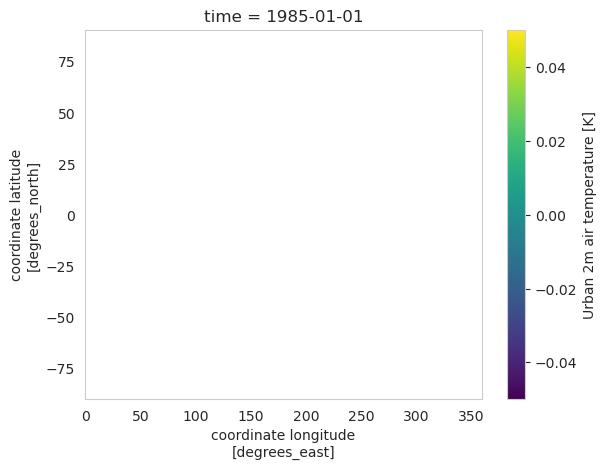

In [79]:
ds_zarr.TSA_U.isel(time=0).plot()

#  Validate HW data in Parquet files

In [27]:
df_parquet = pd.read_parquet('/Trex/test_case_results/i.e215.I2000Clm50SpGs.hw_production.02/research_results/parquet/ALL_HW_1985.parquet', columns=['lat', 'lon', 'time', 'HW'])

In [22]:
ds_parquet = xr.Dataset.from_dataframe(df_parquet)

In [23]:
hw_timeseries_parquet = ds_parquet.HW.sel(lat=lat_coord, lon=lon_coord, method="nearest")
hw_timeseries_parquet = hw_timeseries_parquet.dropna(dim='time')
print(hw_timeseries_parquet)
# Print only the non-null dates
print("Dates with non-null HW values:")
for date in hw_timeseries_parquet.time.values:
    print(date)

<xarray.DataArray 'HW' (time: 0)>
array([], dtype=float64)
Coordinates:
    lat      float32 26.86
    lon      float32 101.2
  * time     (time) datetime64[ns] 
Dates with non-null HW values:


In [28]:
df_parquet =df_parquet.reset_index()
df_parquet

,time,lat,lon,HW
0,1985-01-02 00:00:00,-39.109947,297.50,1.0
1,1985-01-02 00:00:00,-33.455498,22.50,1.0
2,1985-01-02 00:00:00,-31.570681,27.50,1.0
3,1985-01-02 00:00:00,-31.570681,116.25,1.0
4,1985-01-02 00:00:00,-30.628273,300.00,1.0
...,...,...,...,...
2401387,1985-12-31 23:00:00,-0.471204,42.50,1.0
2401388,1985-12-31 23:00:00,-0.471204,101.25,1.0
2401389,1985-12-31 23:00:00,-0.471204,102.50,1.0
2401390,1985-12-31 23:00:00,-0.471204,280.00,1.0


In [29]:

filtered_df = df_parquet[(df_parquet['lat'] == lat_coord) & (df_parquet['lon'] == lon_coord)]
filtered_df

,time,lat,lon,HW
